<h1 style="font-size:3rem;color:purple;">Exploratory Data Analysis of Titanic Dataset</h1>
<h1 style="font-size:1.5rem;color:purple;">Author: Brooke Richards</h1>
<h1 style="font-size:1.5rem;color:purple;">Date: 8 June 2024</h1>

Project 6 requries us to use Jupyter, pandas, Seaborn, and other tools to work with data. We'll create a notebook that presents data nicely, with tables for analysis and include interesting graphs and charts.


<font color='#e39ae3'>**Import Dependencies**</font>


In [265]:
# import dependencies
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

<font color='#e39ae3'>**Data Acquisition**</font>

In [266]:
# load the dataset
df = sns.load_dataset('titanic')

# ensure the data came through
print(df.head()[df.columns[:5]])

   survived  pclass     sex   age  sibsp
0         0       3    male  22.0      1
1         1       1  female  38.0      1
2         1       3  female  26.0      0
3         1       1  female  35.0      1
4         0       3    male  35.0      0


<font color='#e39ae3'>**Initial Data Inspection**</font>

In [267]:
print(df.head(10)) # displays first ten rows
print(df.shape) # displays number of rows and columns in dataset
print(df.dtypes) # displays type of data in each column

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

<font color='#e39ae3'>**Initial Descriptive Statistics**</font>

In [268]:
columns_to_describe = df.drop(columns=['survived'])  # remove column containing binary data
summary_stats = columns_to_describe.describe().round(2)  # round the summary statistics to two decimal places for easier reading
print(summary_stats)  # display rounded summary statistics for each column with numerical data

       pclass     age   sibsp   parch    fare
count  891.00  714.00  891.00  891.00  891.00
mean     2.31   29.70    0.52    0.38   32.20
std      0.84   14.53    1.10    0.81   49.69
min      1.00    0.42    0.00    0.00    0.00
25%      2.00   20.12    0.00    0.00    7.91
50%      3.00   28.00    0.00    0.00   14.45
75%      3.00   38.00    1.00    0.00   31.00
max      3.00   80.00    8.00    6.00  512.33


<font color='#e39ae3'>**Initial Data Distribution for Numerical Columns**</font>

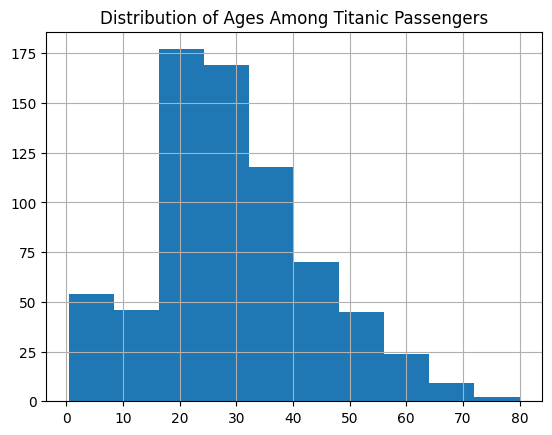

In [269]:
# histogram by numerical column
df['age'].hist(); # plots the distribution of ages among the passengers
plt.title('Distribution of Ages Among Titanic Passengers');  # add title

<font color='#e39ae3'>**Initial Data Distribution for All Numerical Columns**</font>

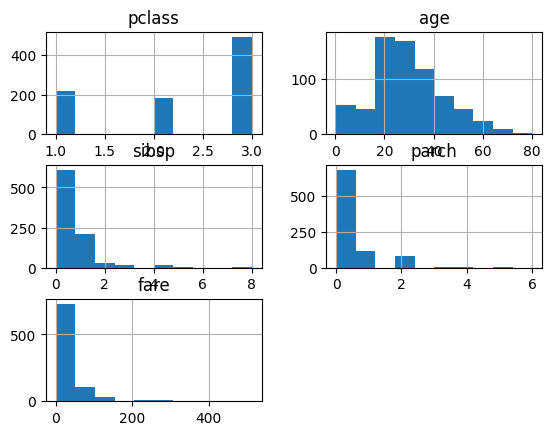

In [270]:
# histograms for all numerical columns
numerical_cols = df.select_dtypes(include='number').drop(columns=['survived']) # removing survived column since its in binary

# plot histograms for numerical columns
numerical_cols.hist()

# display plots
plt.show()

I was surprised to see that the majority of people on the Titanic were in third class. I assumed the majority would be in second class because in the movie it seems like those were "average" and third class were "poor". But it makes sense this way, it's more like a plain were there is first class, business class, and then the majority in economy. 

<font color='#e39ae3'>**Initial Data Distribution for Categorical Columns**</font>

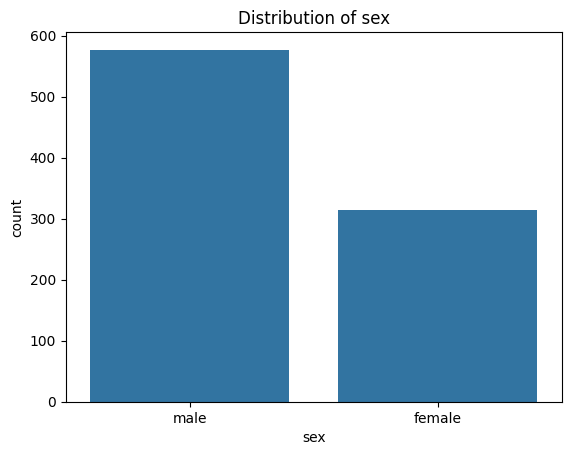

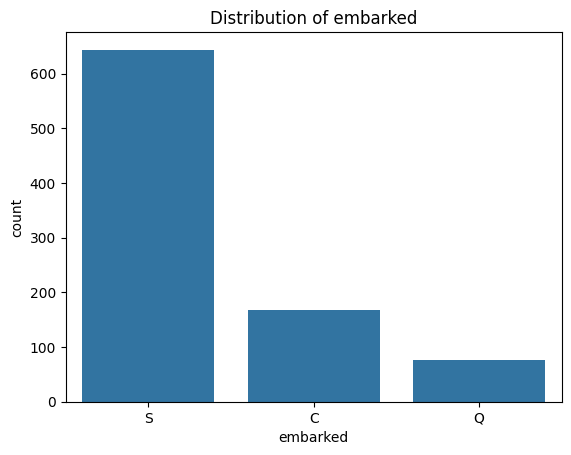

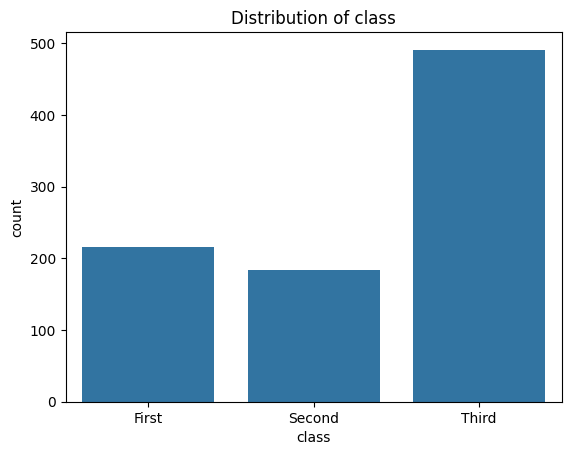

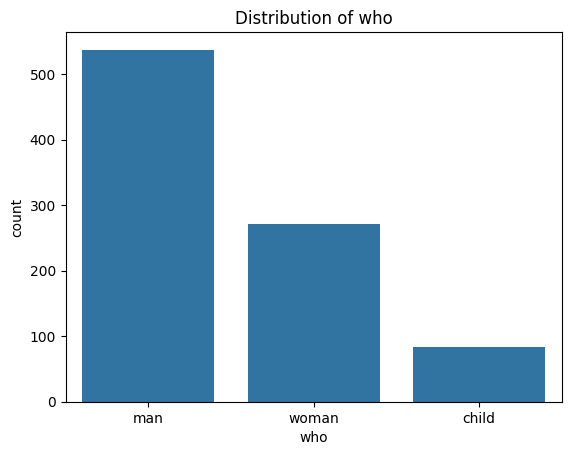

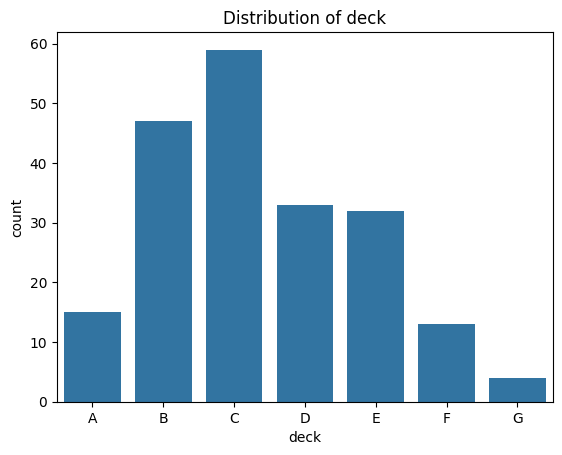

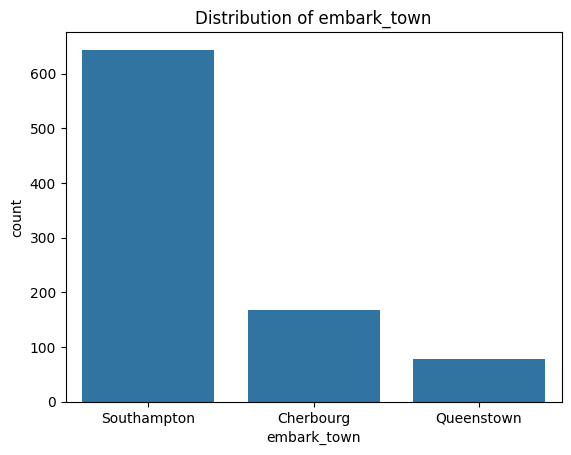

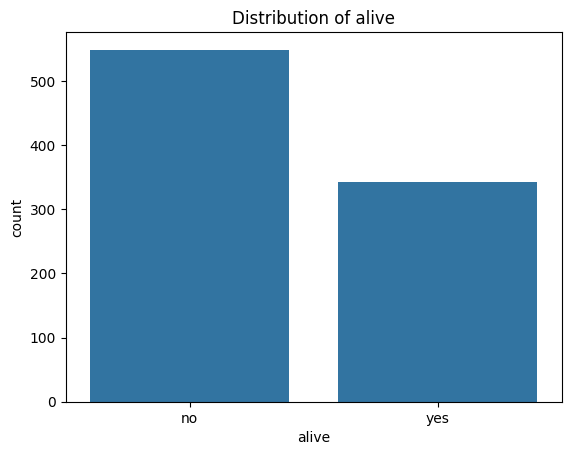

In [271]:
# inspect value counts by categorical column
df['class'].value_counts() # displays the count of unique values in the 'class' column

# inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# show all plots
plt.show()

With this data, I was suprised that there were so many more men then woman on the ship. 

<font color='#e39ae3'>**Initial Data Transformation and Feature Engineering**</font>

In [272]:
# rename column
df.rename(columns={'fare': 'ticket_price'}, inplace=True) 

# add a new column
df['ticket_price'] = round(df['ticket_price'], 2) # round column to 2 decimal places since its currency
inflation_rate = 14214.51 / 100  # 14,214.51% inflation rate in England since 1912 according to ChatGPT
df['inflated_price'] = round(df['ticket_price'] * (1 + inflation_rate), 2) # add new column 'inflated_price' which calculates the inflated ticket prices

# display modifications
print(df.head())

   survived  pclass     sex   age  sibsp  parch  ticket_price embarked  class  \
0         0       3    male  22.0      1      0          7.25        S  Third   
1         1       1  female  38.0      1      0         71.28        C  First   
2         1       3  female  26.0      0      0          7.92        S  Third   
3         1       1  female  35.0      1      0         53.10        S  First   
4         0       3    male  35.0      0      0          8.05        S  Third   

     who  adult_male deck  embark_town alive  alone  inflated_price  
0    man        True  NaN  Southampton    no  False         1037.80  
1  woman       False    C    Cherbourg   yes  False        10203.38  
2  woman       False  NaN  Southampton   yes   True         1133.71  
3  woman       False    C  Southampton   yes  False         7601.00  
4    man        True  NaN  Southampton    no   True         1152.32  


I renamed "fare" as "ticket_price" so it is more easily understood. I was also interested in how much the ticket price would be today, so I looked up the inflation rate in England from 1912 to 2024 and added a new column representing the ticket price in today's amount. 

<font color='#e39ae3'>**Initial Visualizations**</font>

*What was the survival rate of Titanic passengers by sex?*  

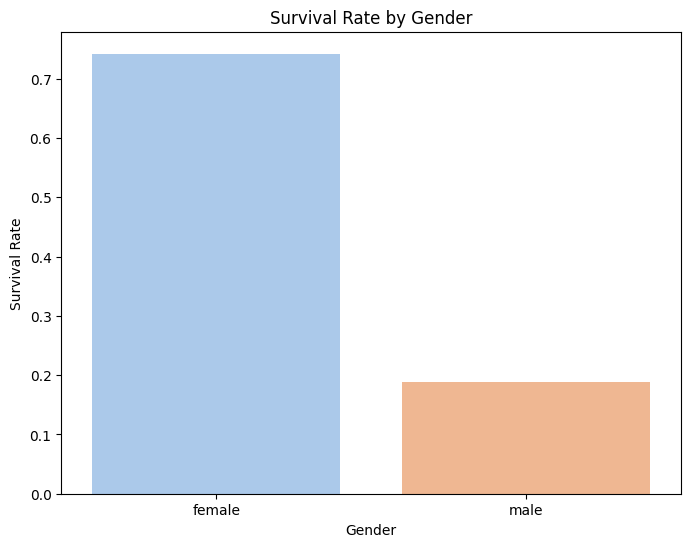

In [273]:
# calculate survival rate by sex
survival_rate_by_gender = df.groupby('sex')['survived'].mean()

# organize plot
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_rate_by_gender.index, y=survival_rate_by_gender.values, hue=survival_rate_by_gender.index, palette='pastel', legend=False) # determine the colors you want use and remove the legend since theres only two columns
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')

# display plot
plt.show()

OBERSERVATIONS

*What was the survival rate of Titanic passengers by age group?*

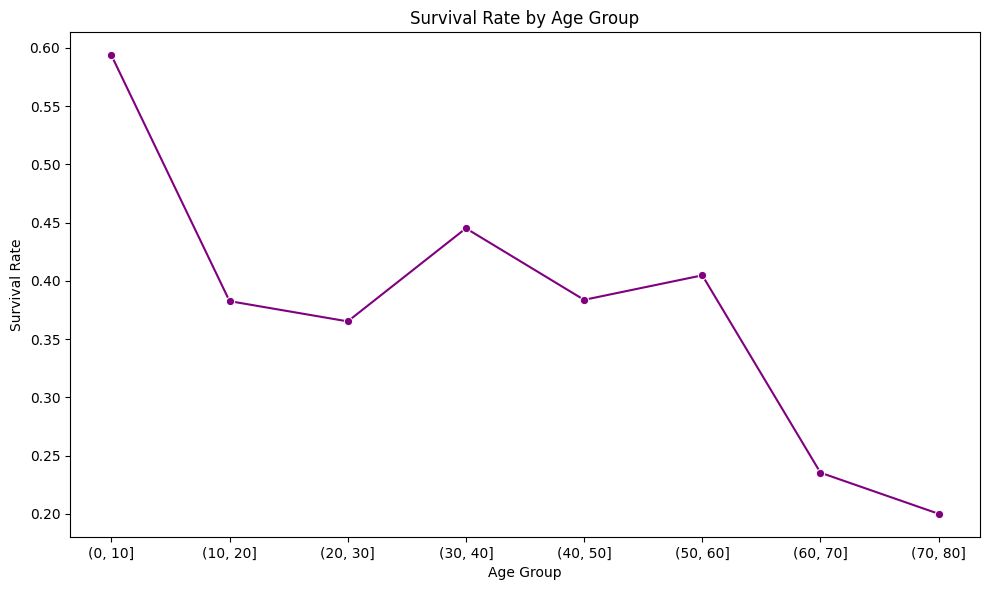

In [274]:
# calculate survival rate by age group
df.dropna(subset=['age'], inplace=True) # ignore rows with no age value
age_bins = range(0, int(df['age'].max()) + 10, 10) # define age groups with 10-year intervals
df['age_group'] = pd.cut(df['age'], bins=age_bins) # create age groups column
survival_rate_by_age = df.groupby('age_group', observed=False)['survived'].mean().reset_index() # calculate survival rate by age
survival_rate_by_age['age_group'] = survival_rate_by_age['age_group'].astype(str) # converts to string (was getting an error without this)

# organize plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='age_group', y='survived', data=survival_rate_by_age, marker='o', color='purple')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.tight_layout()

# display plot
plt.show()

OBSERVATIONS

*Did travelers have a better chance of survival if traveling alone?*

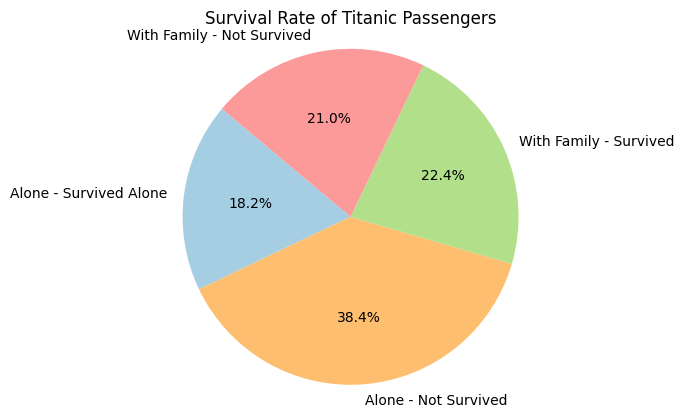

In [275]:
# calculate survival rate for passengers traveling alone and with family
survival_rates = df.groupby(['alone', 'survived']).size().unstack()
survival_rates['Survival Rate'] = survival_rates[1] / (survival_rates[1] + survival_rates[0])

# organize plot
labels = ['Alone - Survived Alone', 'Alone - Not Survived', 'With Family - Survived', 'With Family - Not Survived']
sizes = [survival_rates.loc[True, 1], survival_rates.loc[True, 0], survival_rates.loc[False, 1], survival_rates.loc[False, 0]]
pastel_colors = ['#a6cee3', '#fdbf6f', '#b2df8a', '#fb9a99']
plt.pie(sizes, labels=labels, colors=pastel_colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Survival Rate of Titanic Passengers')

# display plot
plt.show()

OBSERVATIONS